## Подготовка данных

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности.
Нам доступны данные до 2016 года, и требуется спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными.

Прежде чем приступать к поиску скрытых в данных зависимостей, необходимо изучить общую информацию о данных: структуру, пропуски, корректность значений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

games = pd.read_csv('/datasets/games.csv')
games.info() #общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.columns=games.columns.str.lower() #названия стобцов к нижнему регистру

Видим, что имеются пропуски в столбцах name, year_of_release, genre,critic_score,user_score, rating. Можем ознакомиться с такими пропусками:

In [4]:
games[games['name'].isna()] #имеем две неизвестные игры 1993 года 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
games[games['genre'].isna()] #жанр отсутсвует только у тех же неизвестных игр

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В некоторых строках оценка пользователей = 'tbd'. Скорее всего, это означает, что данные еще обрабатываются и будут добавлены позднее. Заменим такие значения на NaN

In [10]:
games['user_score'].replace('tbd',np.nan,inplace=True,regex=True)

Столбец user_score должен иметь тип float, а не строковый:

In [11]:
games['user_score'] = games['user_score'].astype(float)

Изменим тип данных столбца year_of_release с float на int:

In [12]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Попробуем определить недостающие года поиском игр с таким же названием, но известным годом:

In [13]:
for i in games[games['year_of_release'].isnull()].index:
    games['year_of_release'][i]=games.loc[games['name']==games['name'][i],'year_of_release'].max()
    
games.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Удалось восстановить года для 123 строк (осталось 146)

In [14]:
games['sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales'] #новый столбец с суммарными продажами по всем регионам

Промежуточные итоги:
Изучили общую структуру датасета, выявили наличие пропусков и успешно восстановили часть пропусков столбца year_of_release. Выявили нечисловое значение столбца user_score и заменили его на NaN. Обнаружили некорректные типы данных столбцов year_of_release и user_score и исправили на необходимые. Для удобства дальнейшего анализа добавили новый столбец суммарных продаж по трем регионам.

# Исследовательский анализ

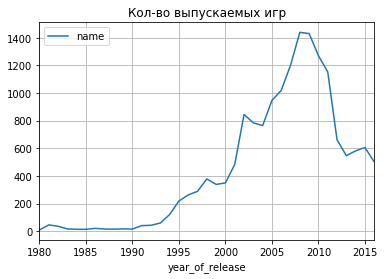

In [15]:
games.pivot_table(index='year_of_release',values='name',aggfunc='count').plot(grid=True,title='Кол-во выпускаемых игр')

Из графика видно, что стремительный рост компьютерных игр начался в 90-ые. Пик пришелся на 2008-2009 года. Затем следует спад, скорее всего обусловленный развитием мобильных устройств

Отсортируем платформы по числу продаж:

In [16]:
popular=games.pivot_table(index='platform',values='sales',aggfunc='sum').sort_values('sales',ascending=False)

Text(0, 0.5, 'Количество продаж')

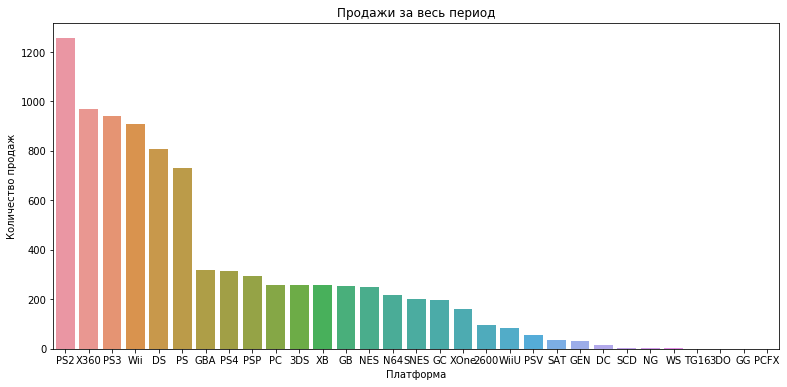

In [17]:
plt.figure(figsize=(13,6))
sns.barplot(x=popular.index,y=popular['sales'])
plt.title("Продажи за весь период")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

Самыми продаваемыми за весь период являются PS2,X360,PS3,Wii, DS,PS

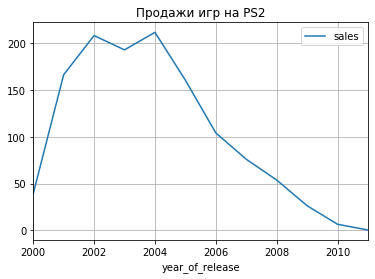

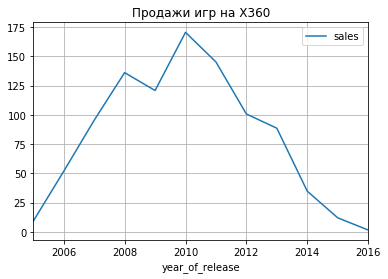

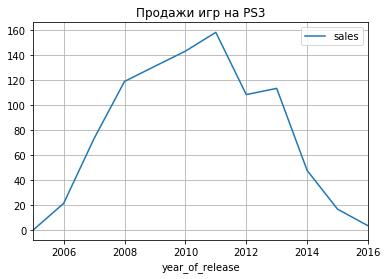

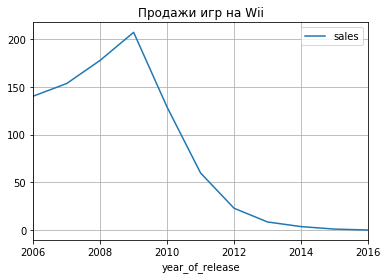

In [18]:
games.query('platform == "PS2"').pivot_table(index='year_of_release',values='sales',aggfunc='sum').plot(title='Продажи игр на PS2',grid=True)
games.query('platform == "X360"').pivot_table(index='year_of_release',values='sales',aggfunc='sum').plot(title='Продажи игр на X360',grid=True)
games.query('platform == "PS3"').pivot_table(index='year_of_release',values='sales',aggfunc='sum').plot(title='Продажи игр на PS3',grid=True)
games.query('platform == "Wii"').pivot_table(index='year_of_release',values='sales',aggfunc='sum').plot(title='Продажи игр на Wii',grid=True)

На примере PS2 и PS3 легко заметить тенденцию: с выходом новой консоли, продажи на консоли предыдущего поколения снижаются (спад для PS2 в 2006 и одновременный рост для PS3). При этом продажи игр на каждой из рассмотренных консолей высоки в течение 6-7 лет. 

Если рассмотрим ситуацию до 1995 года, то список популярных платформ иной:

Text(0, 0.5, 'Количество продаж')

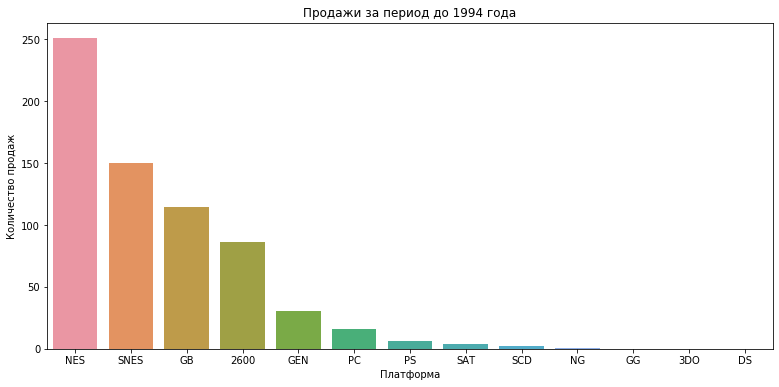

In [19]:
popular_1994=games.query('year_of_release < 1995').pivot_table(index='platform',values='sales',aggfunc='sum').sort_values('sales',ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=popular_1994.index,y=popular_1994['sales'])
plt.title("Продажи за период до 1994 года")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

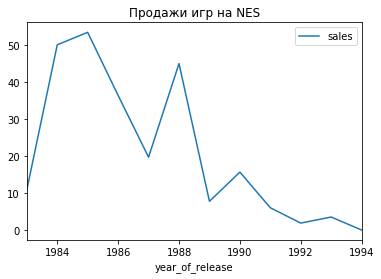

In [20]:
games.query('platform == "NES"').pivot_table(index='year_of_release',values='sales',aggfunc='sum').plot(title='Продажи игр на NES')

NES - один из примеров платформ, имевших в прошлом большую популярность, но полностью исчезнувших с продаж в настоящее время. При этом характерный период появления новых и исчезания старых платформ - примерно 10 лет.

Text(0.5, 1.0, 'Продажи в 2016 году')

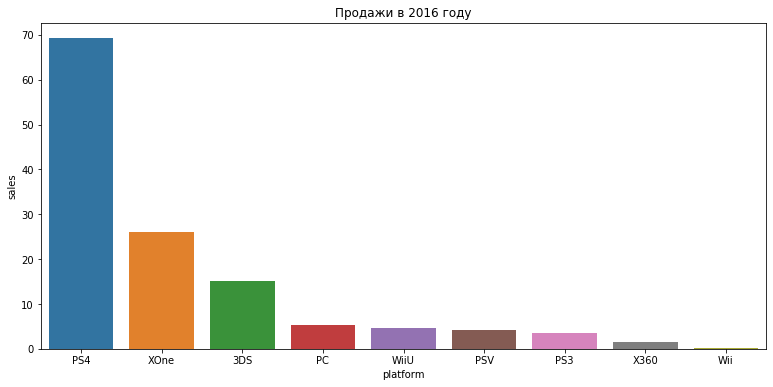

In [21]:
popular_2016=games.query('year_of_release == 2016').pivot_table(index='platform',values='sales',aggfunc='sum').sort_values('sales',ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=popular_2016.index,y=popular_2016['sales'])
plt.title('Продажи в 2016 году')


Рассмотрев продажи в 2016 году, можем заметить, что большей популярностью пользуется PS4, хотя за весь период на первом месте была PS3. Это связано с выходом PS4 в 2013 году и вытеснением устаревшей PS3. Поэтому далее будем рассматривать данные только с 2013 года.

In [22]:
games=games.query('year_of_release >2012')

Рассмотрим ситуацию по продажам в новом срезе данных (с 2013 года):

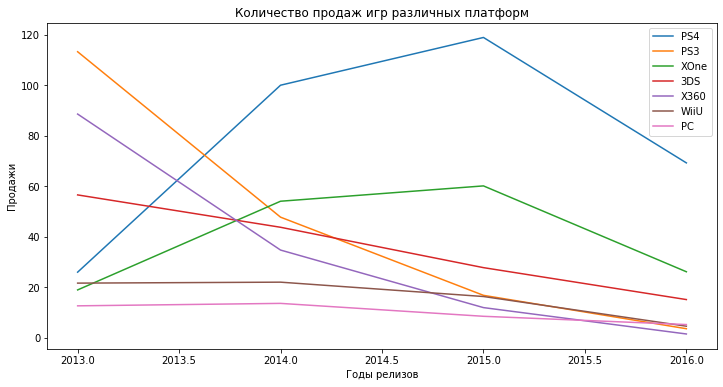

In [23]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж игр различных платформ')
plt.xlabel('Годы релизов')
plt.ylabel('Продажи')
platform_sales=games.pivot_table(index='platform',values='sales',aggfunc='sum').sort_values('sales',ascending=False).head(7)
for i in platform_sales.index:
    sns.lineplot(data=games[games['platform']==i].pivot_table(index='year_of_release', values='sales', aggfunc='sum')['sales'], label=i)
    plt.legend()

Можно отметить, что лидируют по продажам PS4, Xbox One. Стремительно падают продажи 3DS, PS3 (из-за выхода PS4), Xbox360 (аналогично, из-за выхода в 2013 году Xbox One). Продажи на WiiU и PC держатся примерно стабильно, но в целом для всех расмотренных платформ отмечается спад продаж. На мой взгляд, потенциально прибыльными можно назвать PS4 и Xbox One.

Построим "ящики с усами":

In [24]:
top_platforms=platform_sales.index # будем работать только с 7 популярными платформами
box_data=games[games['platform'].isin(top_platforms)]
for i in top_platforms:
    print(box_data.query('platform == @i')['sales'].describe())


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales, dtype: float64
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: sales, dtype: float64
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales, dtype: float64
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: sales, dtype: float64
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: sales, dtype: float64
count    115.000000
mean       0.562000
std        1.038778


Text(0, 0.5, 'Продажи')

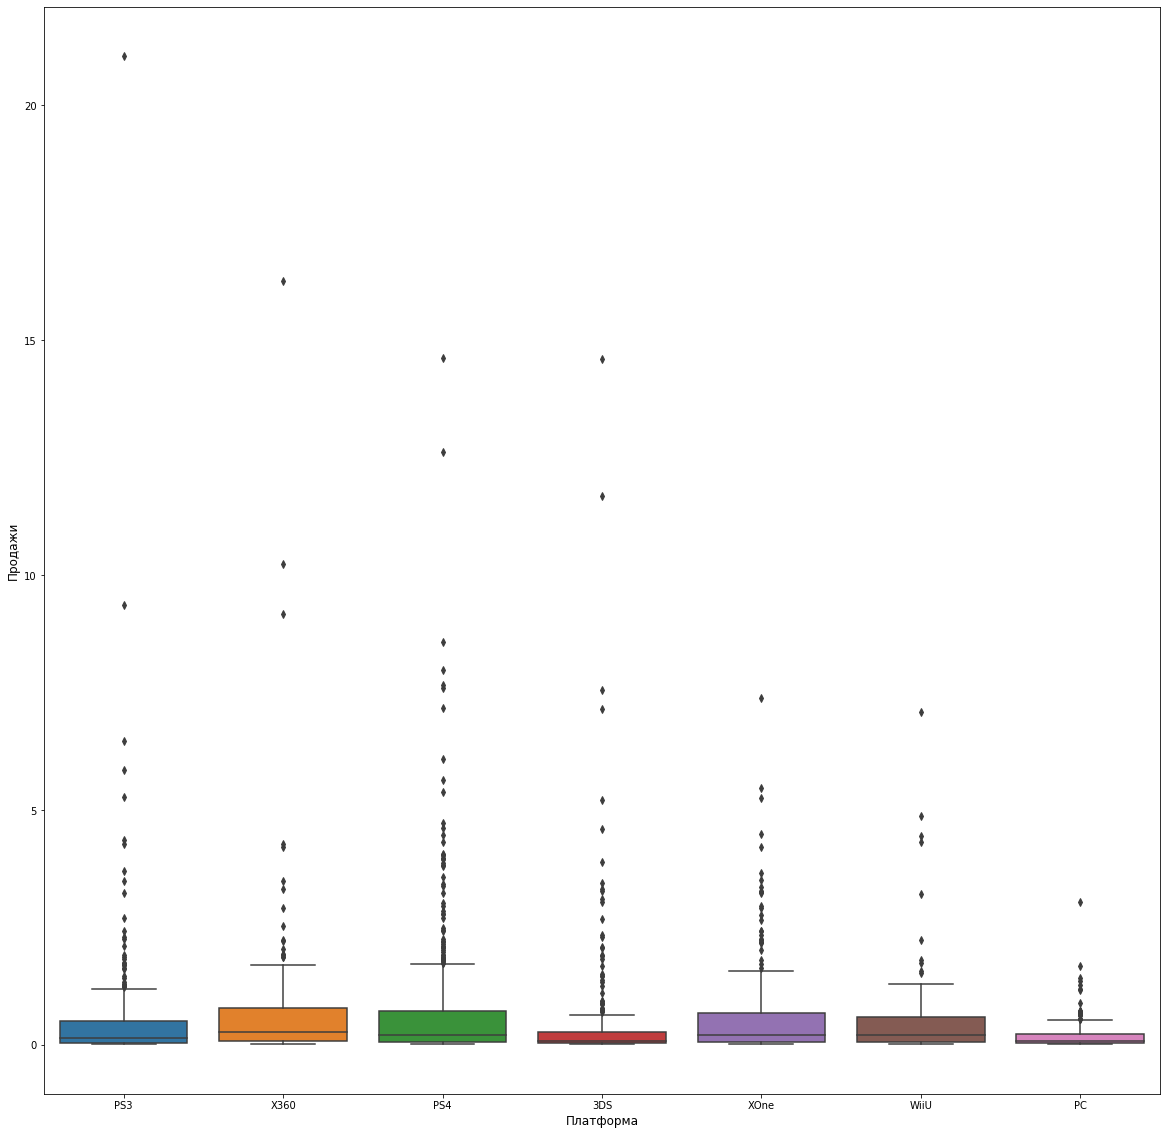

In [25]:
plt.figure(figsize=(20,20))
sns.boxplot(data=box_data, x='platform', y='sales')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Для всех платформ существует большое отклонение максимальных значений от третьего квартиля - наличие существенных выбросов (это видно и в значительной разнице между средним значением и медианой). Избавимся от них, определив диапазон нормальных значений как размах усов (от Q1-1.5*IQR до Q3+1.5*IQR)

Среднее значение 0.30621301775147935
Медиана 0.13999999999999999
Среднее значение 0.23726688102893892
Медиана 0.12
Среднее значение 0.34322727272727277
Медиана 0.175
Среднее значение 0.1308365019011407
Медиана 0.07
Среднее значение 0.3897058823529412
Медиана 0.225
Среднее значение 0.3029523809523809
Медиана 0.18000000000000002
Среднее значение 0.11170588235294118
Медиана 0.05


([<matplotlib.axis.XTick at 0x7fad8e0efdd0>,
 <a list of 7 Text xticklabel objects>)

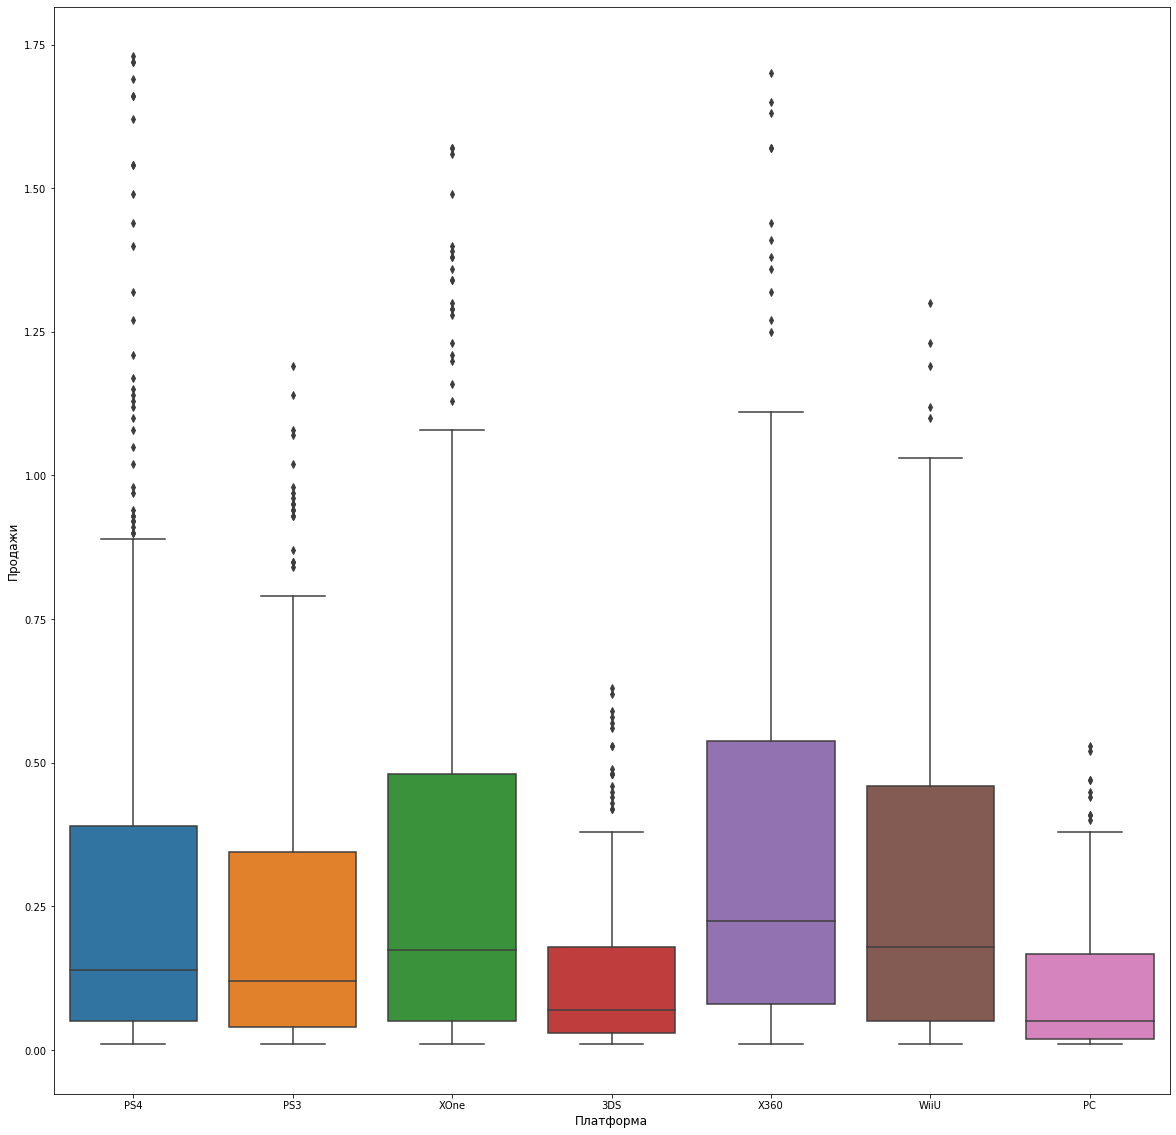

In [26]:
boxplot_data=[]
data=[]
for i in top_platforms:
    data1=box_data.query('platform == @i')
    Q1=data1['sales'].quantile(0.25)
    Q3=data1['sales'].quantile(0.75)
    IQR=Q3-Q1
    data1=data1[(data1['sales']>=(Q1-1.5*IQR))&(data1['sales']<=(Q3+1.5*IQR))]
    print('Среднее значение',data1['sales'].mean())
    print('Медиана',data1['sales'].quantile(0.5))
    boxplot_data.append(data1['sales'])
    data.append(data1)
    

plt.figure(figsize=(20,20))
sns.boxplot(data=boxplot_data)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.xticks(np.arange(7),top_platforms)

Медианные значения для разных платформ отличаются, однако все датасеты сильно скошены вправо, что свидетельствует о том, что продажи за некоторые года ощутимо больше медианного значения (видимо, в пике своей популярности). В лидерах по-прежнему остаются PS4 и Xbox One, но видимо из-за удаления выбросов с ними сравнялись Xbox 360 и WiiU c большими медианными значениями. По среднему значению лучшие показатели продаж у Xbox 360,Xbox One, затем PS4 и WiiU.

Рассмотрим как влияют на продажи на PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad8e865fd0>,
      dtype=object)

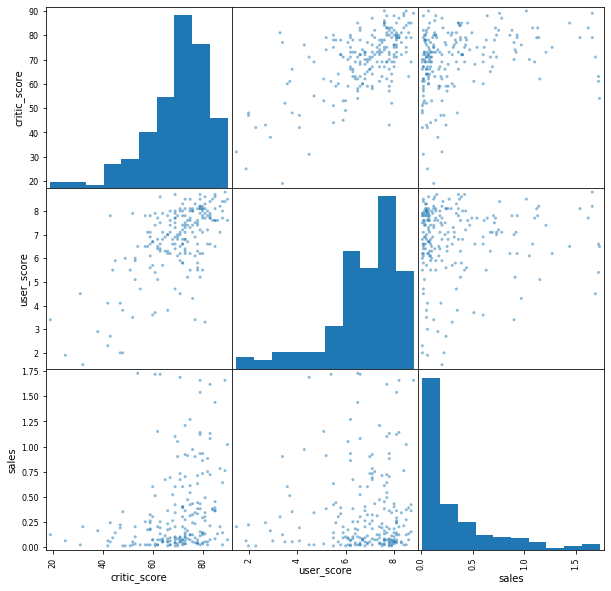

In [27]:
pd.plotting.scatter_matrix(data[0][['critic_score','user_score','sales']],figsize=(10,10))

In [28]:
data[0].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.334930,-0.251374,0.012411,-0.313896,0.067506,0.193490,-0.300799
na_sales,-0.334930,1.000000,0.728539,0.105546,0.934098,0.255204,-0.032795,0.907657
eu_sales,-0.251374,0.728539,1.000000,0.122703,0.922384,0.227442,0.050008,0.931457
jp_sales,0.012411,0.105546,0.122703,1.000000,0.120997,0.123296,0.168354,0.264250
other_sales,-0.313896,0.934098,0.922384,0.120997,1.000000,0.266024,0.010962,0.987377
critic_score,0.067506,0.255204,0.227442,0.123296,0.266024,1.000000,0.638477,0.264572
user_score,0.193490,-0.032795,0.050008,0.168354,0.010962,0.638477,1.000000,0.032088
sales,-0.300799,0.907657,0.931457,0.264250,0.987377,0.264572,0.032088,1.000000


Корреляция между отзывами критиков и продажами составила 0,26, а между отзывами пользователей и продажами 0,03. Оба значения свидетельствуют о довольно слабой взаимосвязи параметров. При этом между отзывами критиков и отзывами пользователей корреляция довольно высока и равна 0,64. Проверим корреляцию для других популярных платформ:

In [29]:
for i in range(7):
    print('Корреляция продаж с отзывами критиков для платформы',top_platforms[i],data[i]['sales'].corr(data[i]['critic_score']))
    print('Корреляция продаж с отзывами пользователей для платформы',top_platforms[i],data[i]['sales'].corr(data[i]['user_score']))

Корреляция продаж с отзывами критиков для платформы PS4 0.2645723362375023
Корреляция продаж с отзывами пользователей для платформы PS4 0.03208779736823888
Корреляция продаж с отзывами критиков для платформы PS3 0.41442336016486564
Корреляция продаж с отзывами пользователей для платформы PS3 0.07243858088372317
Корреляция продаж с отзывами критиков для платформы XOne 0.4201338687981549
Корреляция продаж с отзывами пользователей для платформы XOne 0.05990079044888021
Корреляция продаж с отзывами критиков для платформы 3DS 0.25914443255978287
Корреляция продаж с отзывами пользователей для платформы 3DS -0.05997844176895947
Корреляция продаж с отзывами критиков для платформы X360 0.4719998814213742
Корреляция продаж с отзывами пользователей для платформы X360 0.037685894502836624
Корреляция продаж с отзывами критиков для платформы WiiU 0.4339269991784759
Корреляция продаж с отзывами пользователей для платформы WiiU 0.45490247481234375
Корреляция продаж с отзывами критиков для платформы PC

Умеренная корреляция между продажами и отзывами критиков для платформ Xbox360,WiiU,PC. Между продажами и отзывами пользователей умеренная корреляция только для WiiU, для остальных платформ связь практически нулевая. Таким образом, оценка пользователей практически не влияет на продажи. Для некоторых платформ влияние на продажи оказывает мнение критиков.

Рассмотрим распределение игр по жанрам

Text(0, 0.5, 'Количество игр')

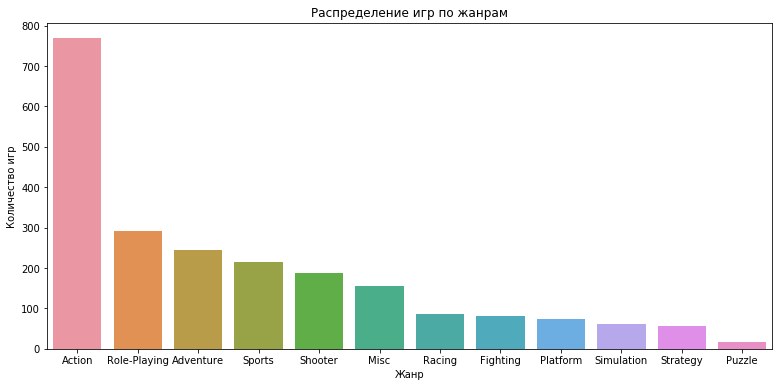

In [30]:
genres=games.pivot_table(index='genre',values='name',aggfunc='count').sort_values('name',ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=genres.index,y=genres['name'])
plt.title("Распределение игр по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Количество игр")

Самым популярным является жанр Action. Теперь посмотрим на жанры с точки зрения продаж:

Text(0, 0.5, 'Продажи')

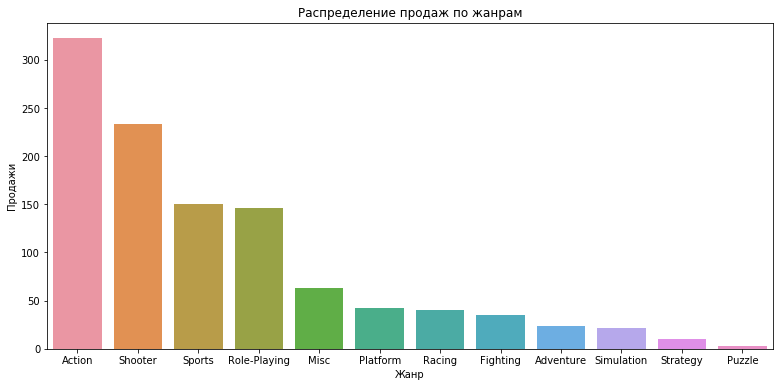

In [31]:
genres=games.pivot_table(index='genre',values='sales',aggfunc='sum').sort_values('sales',ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=genres.index,y=genres['sales'])
plt.title("Распределение продаж по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Продажи")

Action является также и самым прибыльным жанром, наряду с шутерами, спортивными и ролевыми играми. Среди низких продаж - головоломки, стратегии и симуляции.

Промежуточные итоги:

Рассмотрев количество выпущенных игр за весь период, проанализировали историю развития данной отрасли и отметили следующие тенденции: с выходом консоли нового поколения продажи на консоли предыдущего поколения снижаются, пик продаж каждой консоли составляет примерно 6 лет, за 10 лет консоль практически полностью уходит с рынка.
Учитывая стремительное развитие и изменчивость рынка компьютерных игр некорректно для прогноза опираться на всю историю наблюдения. Поэтому было принято решение ограничиться данными с 2013 года - года выхода самой продаваемой на 2016 год платформы PS4. По новому срезу данных выявили самые продаваемые платформы и жанры игр, а также выявили отсутствие существенного влияния на продажи отзывов критиков и пользователей.

## Портреты пользователей

Для каждого из регионов определим:
  самые популярные платформы (топ-5),
  самые популярные жанры (топ-5).

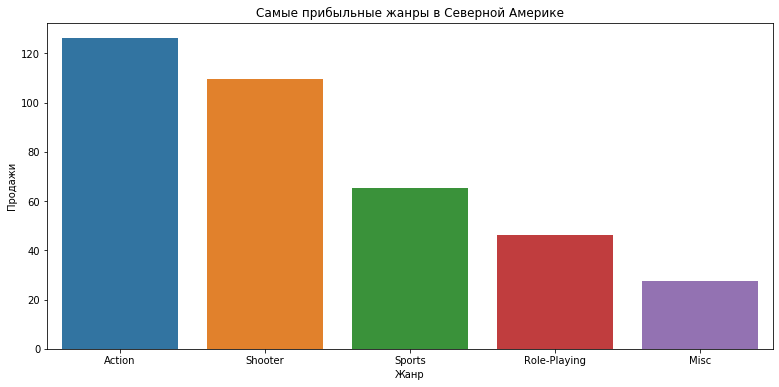

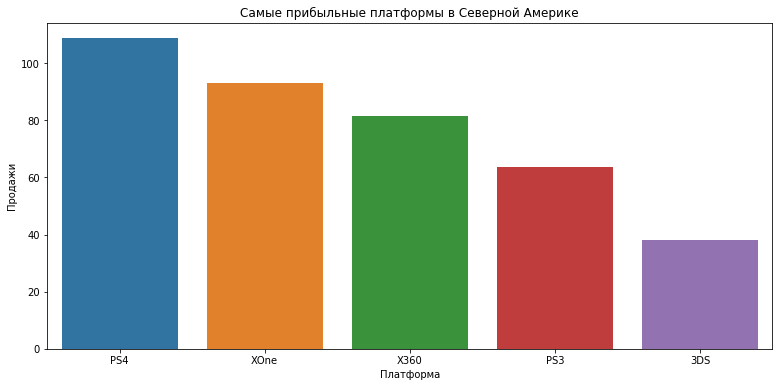

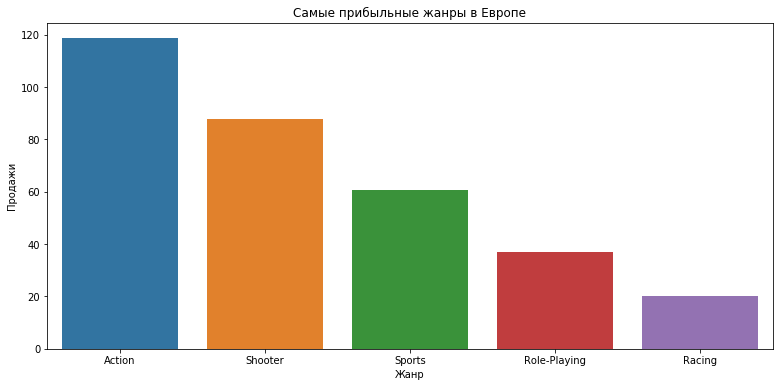

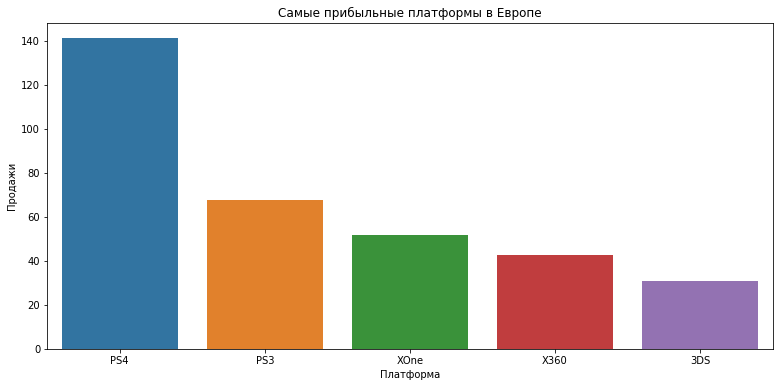

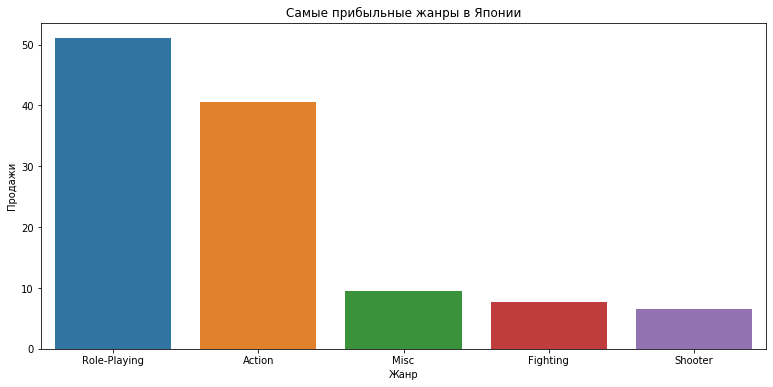

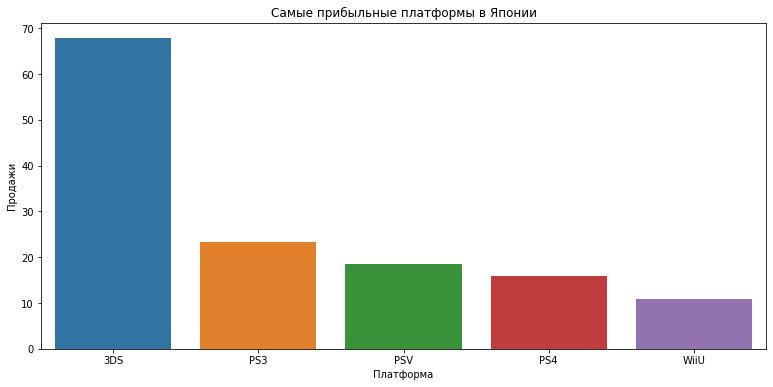

In [45]:
titles={'na_sales': 'в Северной Америке','eu_sales':'в Европе','jp_sales':'в Японии'}

for i in ('na_sales','eu_sales','jp_sales'):
    platf_top=games.pivot_table(index='platform',values=i,aggfunc='sum').sort_values(i,ascending=False).head()
    genres_top=games.pivot_table(index='genre',values=i,aggfunc='sum').sort_values(i,ascending=False).head()
    plt.figure(figsize=(13,6))
    sns.barplot(x=genres_top.index,y=genres_top[i])
    plt.title("Самыe прибыльные жанры "+str(titles[i]))
    plt.xlabel("Жанр")
    plt.ylabel("Продажи")
    plt.figure(figsize=(13,6))
    sns.barplot(x=platf_top.index,y=platf_top[i])
    plt.title("Самые прибыльные платформы "+str(titles[i]))
    plt.xlabel("Платформа")
    plt.ylabel("Продажи")

Ситуация по самым прибыльным жанрам в Северной Америке и Европе практически одинакова - лидируют экшен, шутеры и спортивные игры. В Японии же ситуация кардинально отличается и на первое место выходят ролевые игры, далее - экшен, остальные жанры значительно уступают. Если рассматривать популярность платформ, то в Америке лидируют сменяющие друг друга поколения Playstation(PS3,PS4) и Xbox(Xbox One,Xbox 360), в Европе же Playstation значительно опережает другие платформы, и даже предыдущее поколение PS3 популярнее новой Xbox One. Неудивительно, что в Японии подавляющее большинство продаж за портативной консолью 3DS от Nintendo. Также в топ вошла портативная консоль Playstation Vita (не представленная в топе Америки и Европы совсем) и сравнимые с ней по продажам PS3 и PS4. Очевидно, что японцы отдают предпочтение японским производителям игровых консолей - Sony и Nintendo, а также больше ценят портативные устройства (возможно, на это влияет тот факт, что японцы, как народ трудолюбивый, проводят много времени в дороге и играют на ходу).

Теперь посмотрим на влияние рейтинга ESRB на продажи в регионах

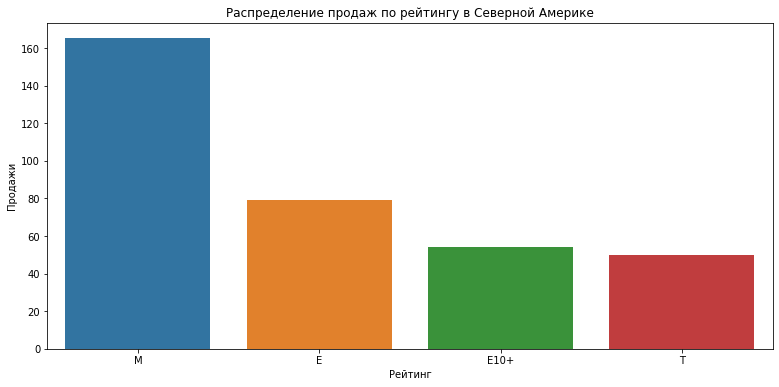

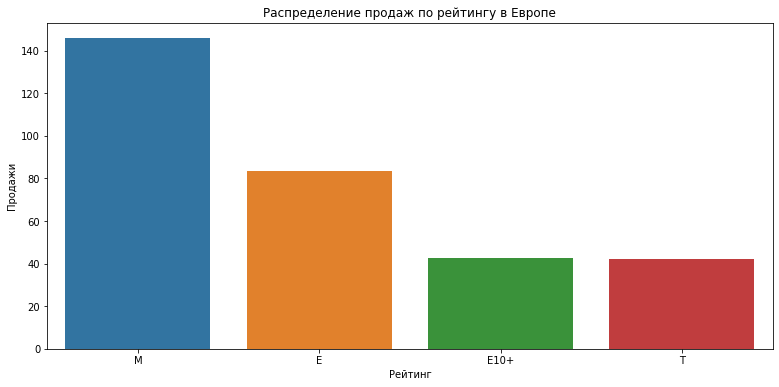

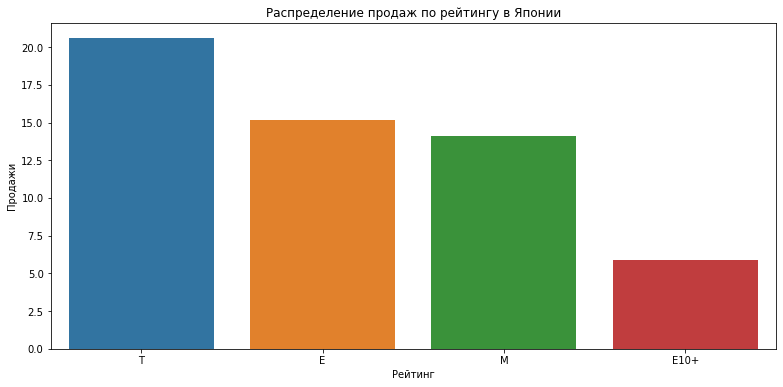

In [46]:
for i in ('na_sales','eu_sales','jp_sales'):
    ESRB=games.pivot_table(index='rating',values=i,aggfunc='sum').sort_values(i,ascending=False)
    plt.figure(figsize=(13,6))
    sns.barplot(x=ESRB.index,y=ESRB[i])
    plt.title("Распределение продаж по рейтингу "+str(titles[i]))
    plt.xlabel("Рейтинг")
    plt.ylabel("Продажи")

Так же как и с жанрами, с рейтингом ситуация в Америке и Европе практически одинакова: больше прибыли приносят игры с рейтингом M -для взрослых(17+), далее идут игры рейтинга Е - для всех(6+). Меньше всего продажи рейтинга E10+ (10+) и T - подростки (13+). И опять выбивается Япония: здесь лидирующие позиции занимают продажи игр рейтинга T.

Промежуточные итоги:
Для каждого из регионов составили портрет пользователя, а именно: определили самые прибыльные жанры, самые прибыльные платформы, а также выяяснили игры какого рейтинга приносят больший доход. 
Очевидно, что при разработке стратегии продвижения продукта необходимо учитывать и менталитет народа региона, так как на примере Японии видим существенные изменения показателей.

## Исследование статистических показателей

Рассчитаем статистики для пользовательских оценок по жанрам:

In [34]:
games_genres=games['genre'].unique()
for genre in games_genres: 
    print('Среднее',genre,':',  games[games['genre']==genre]['user_score'].mean())
    print('Медиана',genre,':',  games[games['genre']==genre]['user_score'].median())
    print('Дисперсия', genre,':', np.var(games[games['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre,':', np.std(games[games['genre']==genre]['user_score']))
    print('\n')

Среднее Action : 6.8374999999999995
Медиана Action : 7.1
Дисперсия Action : 1.761935586734694
Стандартное отклонение Action : 1.3273792173808863


Среднее Shooter : 6.342307692307692
Медиана Shooter : 6.55
Дисперсия Shooter : 2.153594674556213
Стандартное отклонение Shooter : 1.4675130917835837


Среднее Role-Playing : 7.376470588235295
Медиана Role-Playing : 7.6
Дисперсия Role-Playing : 1.4790051903114185
Стандартное отклонение Role-Playing : 1.2161435730666912


Среднее Misc : 6.9750000000000005
Медиана Misc : 7.0
Дисперсия Misc : 1.3799519230769233
Стандартное отклонение Misc : 1.1747135493714727


Среднее Sports : 5.238124999999999
Медиана Sports : 5.5
Дисперсия Sports : 3.160733984375
Стандартное отклонение Sports : 1.7778453207112817


Среднее Fighting : 7.037499999999999
Медиана Fighting : 7.5
Дисперсия Fighting : 1.8790104166666668
Стандартное отклонение Fighting : 1.3707700086690935


Среднее Racing : 6.079999999999999
Медиана Racing : 6.2
Дисперсия Racing : 2.943753846153846


А теперь для оценок критиков:

In [35]:
for genre in games_genres: 
    print('Среднее',genre,':',  games[games['genre']==genre]['critic_score'].mean())
    print('Медиана',genre,':',  games[games['genre']==genre]['critic_score'].median())
    print('Дисперсия', genre,':', np.var(games[games['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre,':', np.std(games[games['genre']==genre]['critic_score']))
    print('\n')

Среднее Action : 71.4873417721519
Медиана Action : 73.0
Дисперсия Action : 141.11059926293862
Стандартное отклонение Action : 11.878998243241668


Среднее Shooter : 72.91791044776119
Медиана Shooter : 76.0
Дисперсия Shooter : 160.8962463800401
Стандартное отклонение Shooter : 12.684488416173515


Среднее Role-Playing : 73.4724409448819
Медиана Role-Playing : 74.0
Дисперсия Role-Playing : 139.4775869551739
Стандартное отклонение Role-Playing : 11.810062953057189


Среднее Misc : 73.27906976744185
Медиана Misc : 75.0
Дисперсия Misc : 77.96863169280692
Стандартное отклонение Misc : 8.829984807054139


Среднее Sports : 71.66071428571429
Медиана Sports : 77.0
Дисперсия Sports : 264.4384566326531
Стандартное отклонение Sports : 16.261563781895426


Среднее Fighting : 69.5952380952381
Медиана Fighting : 72.0
Дисперсия Fighting : 168.3837868480726
Стандартное отклонение Fighting : 12.976277850295615


Среднее Racing : 71.22950819672131
Медиана Racing : 74.0
Дисперсия Racing : 184.7342112335393

Построим гистограммы:

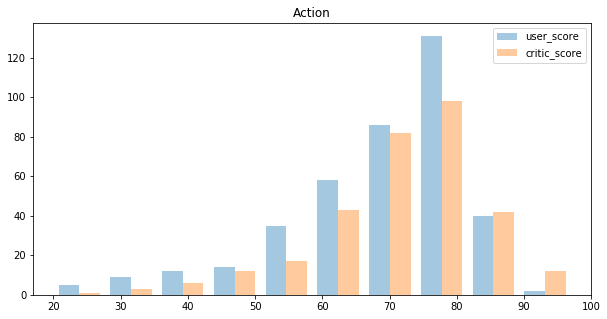

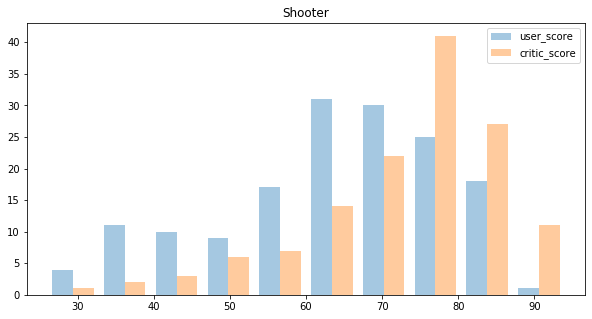

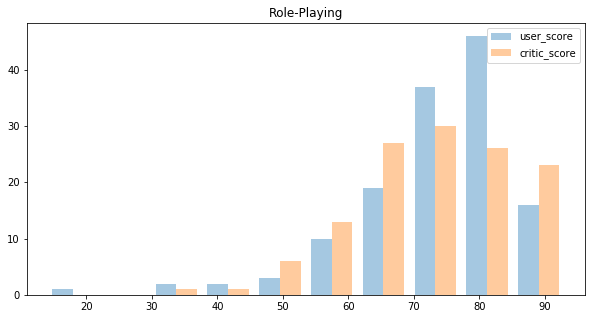

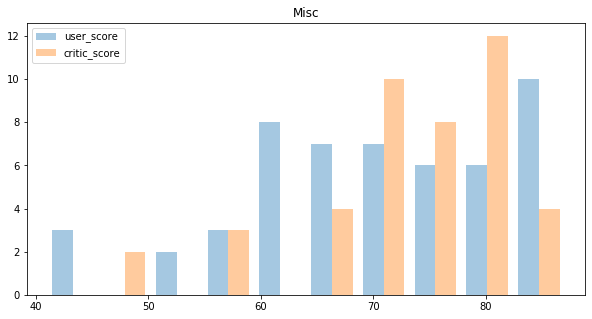

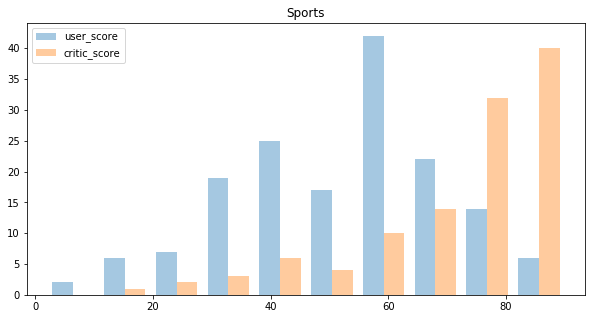

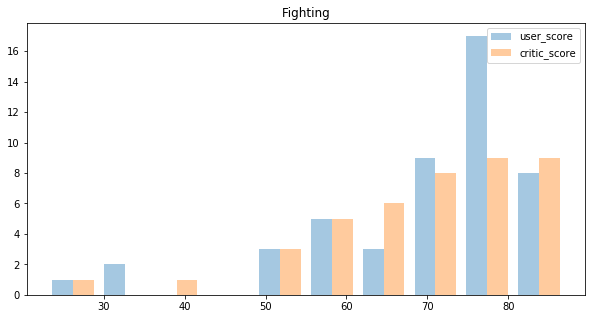

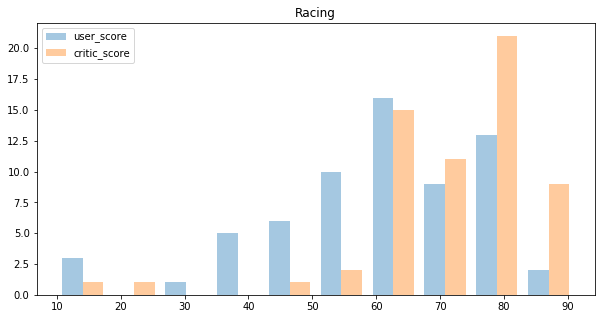

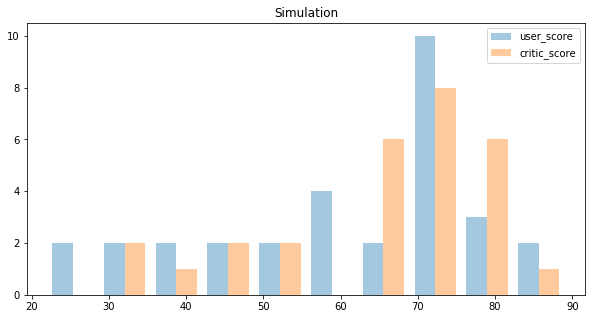

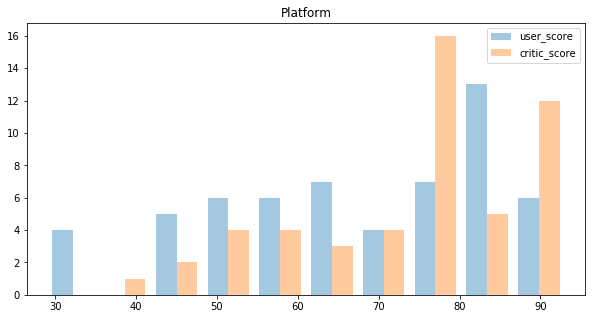

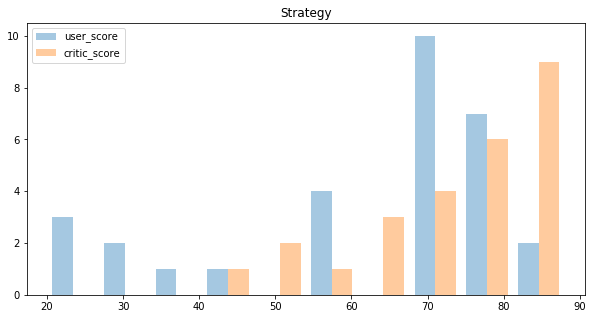

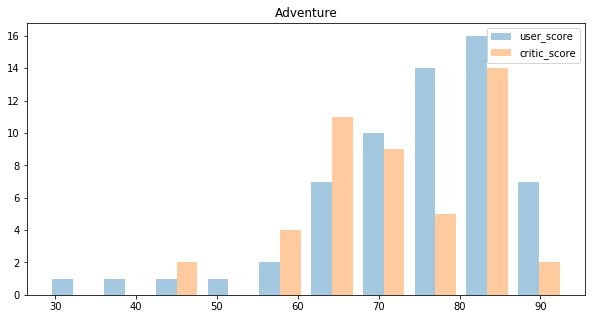

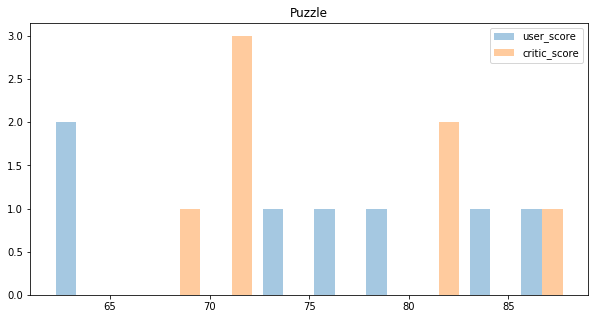

In [36]:
for genre in games_genres:
    plt.figure(figsize=(10,5))
    data = games[games['genre'] == genre]
    user_score = data['user_score'] * 10 # диапазон оценок пользователей от 0 до 10, а критиков - от 0 до 100. Приведем к одному диапазону для наглядности
    critic_score = data['critic_score']
    plt.hist([user_score, critic_score], alpha=0.4, label = ['user_score', 'critic_score'])
    plt.legend()
    plt.title(genre)

Для всех жанров можем наблюдать скошенность оценок как пользователей, так и критиков влево: критики редко ставят оценки больше 80, а пользователи больше 8. В случае экшенов и ролевых игр распределения практически повторяют друг друга, отличается только пик - пользователи примерно одного мнения об играх этих жанров. Стратегии,шутеры,спортивные и гоночные игры больше нравятся критикам, а приключения - пользователям. 

## Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гипотезу сформулируем как "средний пользовательский рейтинг XboxOne равен рейтингу PC". Альтернативная же гипотеза будет о их неравенстве. Используем для проверки t-тест для двух независимых выборок. При этом уровень статистической значимости "альфа" выберем равным 0,01, так как объем выборки довольно большой и вероятность ошибки первого рода снижается.

In [50]:
XboxOne_score=games[games['user_score'].isna() !=1].query('platform == "XOne"')['sales'] #выберем только ненулевые рейтинги для нужных платформ
PC_score=games[games['user_score'].isna() !=1].query('platform == "PC"')['sales']
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(XboxOne_score, PC_score,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

182
p-значение: 1.246710092240049e-09
Отвергаем нулевую гипотезу


Получаем практически нулевое p-значение, то есть вероятность того, что такой результат мог быть получен случайно, почти нулевая. Следовательно гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергаем.

Теперь проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевую гипотезу сформулируем как "средние пользовательские рейтинги жанров Action и Sports равны", альтернативную - "средние пользовательские рейтинги жанров Action и Sports разные".

In [38]:
Action_score=games[games['user_score'].isna() !=1].query('genre == "Action"')['sales'] #выберем только ненулевые рейтинги для нужных платформ
Sports_score=games[games['user_score'].isna() !=1].query('genre == "Sports"')['sales']
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(Action_score, Sports_score,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.06844452364627827
Не получилось отвергнуть нулевую гипотезу


Получаем существенное p-значение. Значит отвергнуть нулевую гипотезу не можем, и есть основания предполагать, что средние пользовательские рейтинги жанров Action и Sports разные.

## Выводы

В ходе исследования было проанализировано количество выпускаемых игр за весь период. Установлено, что стремительный рост компьютерных игр начался в 90-ые. Пик пришелся на 2008-2009 года. Затем следует спад, скорее всего обусловленный развитием мобильных устройств. Самыми продаваемыми за весь период являются PS2,X360,PS3,Wii, DS,PS. 

При анализе продаж были выявлены следующие закономерности. На примере PS2 и PS3 легко заметить тенденцию: с выходом новой консоли, продажи на консоли предыдущего поколения снижаются (спад для PS2 в 2006 и одновременный рост для PS3). При этом продажи игр на каждой из рассмотренных консолей высоки в течение 6-7 лет. Также удалось выявить примеры платформ, имевших в прошлом большую популярность, но полностью исчезнувших с продаж в настоящее время (NES). При этом характерный период появления новых и исчезания старых платформ - примерно 10 лет. Рассмотрев продажи в 2016 году, можем заметить, что большей популярностью пользуется PS4, хотя за весь период на первом месте была PS3. Это связано с выходом PS4 в 2013 году и вытеснением устаревшей PS3. Учитывая такое стремительное развитие рынка, бессмысленно рассматривать в прогнозе на 2017 год данные за всю историю, поэтому ограничились рассмотрением данных с 2013 года - года выхода самой популярной на 2016 год консоли PS4. Можно отметить, что лидируют по продажам PS4, Xbox One. Стремительно падают продажи 3DS, PS3 (из-за выхода PS4), Xbox360 (аналогично, из-за выхода в 2013 году Xbox One). Продажи на WiiU и PC держатся примерно стабильно, но в целом для всех расмотренных платформ отмечается спад продаж. Можно сделать прогноз, что и в 2017 году потенциально прибыльными будут PS4 и Xbox One. 

Также были исследовано влияние оценок критиков и пользователей на продажи игр по каждой из платформ. Умеренная корреляция между продажами и отзывами критиков для платформ Xbox360,WiiU,PC. Между продажами и отзывами пользователей умеренная корреляция только для WiiU, для остальных платформ связь практически нулевая. Таким образом, оценка пользователей практически не влияет на продажи. Для некоторых платформ влияние на продажи оказывает мнение критиков. 

Самым популярным является жанр Action (экшен). Экшен является также и самым прибыльным жанром, наряду с шутерами, спортивными и ролевыми играми. Среди низких продаж - головоломки, стратегии и симуляции.

В ходе анализа были составлены портреты пользователей различных регионов. 
Ситуация по самым прибыльным жанрам в Северной Америке и Европе практически одинакова - лидируют экшен, шутеры и спортивные игры. В Японии же ситуация кардинально отличается и на первое место выходят ролевые игры, далее - экшен, остальные жанры значительно уступают. Если рассматривать популярность платформ, то в Америке лидируют сменяющие друг друга поколения Playstation(PS3,PS4) и Xbox(Xbox One,Xbox 360), в Европе же Playstation значительно опережает другие платформы, и даже предыдущее поколение PS3 популярнее новой Xbox One. Неудивительно, что в Японии подавляющее большинство продаж за портативной консолью 3DS от Nintendo. Также в топ вошла портативная консоль Playstation Vita (не представленная в топе Америки и Европы совсем) и сравнимые с ней по продажам PS3 и PS4. Очевидно, что японцы отдают предпочтение японским производителям игровых консолей - Sony и Nintendo, а также больше ценят портативные устройства (возможно, на это влияет тот факт, что японцы, как народ трудолюбивый, проводят много времени в дороге и играют на ходу). Так же как и с жанрами, с рейтингом ситуация в Америке и Европе практически одинакова: больше прибыли приносят игры с рейтингом M -для взрослых(17+), далее идут игры рейтинга Е - для всех(6+). Меньше всего продажи рейтинга E10+ (10+) и T - подростки (13+). И опять выбивается Япония: здесь лидирующие позиции занимают продажи игр рейтинга T. 
В целом, для каждого региона жанр экшн не теряет лидирующих позиций, и можно сделать ставку на то, что и в 2017 году он будет популярен.

Также были сформулированы и проверены следующие гипотезы: 
   гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные 
В результате есть основания предполагать, что и средние пользовательские рейтинги платформ Xbox One и PC, и средние пользовательские рейтинги жанров Action и Sports разные.